In [0]:
from google.colab import files
upladed = files.upload()

Saving Corona - Feuille 1 (1).csv to Corona - Feuille 1 (1) (1).csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('/content/Corona - Feuille 1 (1).csv')

## Covid-19 Date:03/04/2020

In [0]:
df.head()

,Country,Total\nCases,New\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,Critical Cases\n,Tot Cases/\n1M pop,Deaths/\n1M pop
0,USA,258112,13235.0,6572,502.0,11941,239599,5781,780,20
1,Italy,119827,4585.0,14681,766.0,19758,85388,4068,1982,243
2,Spain,117710,5645.0,10935,587.0,30513,76262,6416,2518,234
3,Germany,89451,4657.0,1208,101.0,24575,63668,3936,1068,14
4,China,81620,31.0,3322,4.0,76571,1727,379,57,2


In [0]:
df.isnull().sum()

Country               0
Total\nCases          0
New\nCases            2
Total\nDeaths         0
New\nDeaths           3
Total\nRecovered      0
Active\nCases         0
Critical Cases\n      0
Tot Cases/\n1M pop    0
Deaths/\n1M pop       0
dtype: int64

In [0]:
df.drop(columns=["New\nCases","New\nDeaths"], axis=1 , inplace=True)

In [0]:
df.head()

,Country,Total\nCases,Total\nDeaths,Total\nRecovered,Active\nCases,Critical Cases\n,Tot Cases/\n1M pop,Deaths/\n1M pop
0,USA,258112,6572,11941,239599,5781,780,20
1,Italy,119827,14681,19758,85388,4068,1982,243
2,Spain,117710,10935,30513,76262,6416,2518,234
3,Germany,89451,1208,24575,63668,3936,1068,14
4,China,81620,3322,76571,1727,379,57,2


In [0]:
df.describe()

,Total\nCases,Total\nDeaths,Total\nRecovered,Active\nCases,Critical Cases\n,Tot Cases/\n1M pop,Deaths/\n1M pop
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,61357.333333,3538.533333,14150.733333,43668.066667,2362.200000,1006.200000,64.733333
std,66765.682191,4308.639060,19784.140288,60311.226063,2457.996344,759.517629,77.875786
min,10062.000000,168.000000,135.000000,1727.000000,55.000000,57.000000,2.000000
25%,16246.500000,464.500000,2000.500000,11175.000000,296.500000,436.500000,9.500000
50%,38168.000000,1487.000000,6021.000000,17364.000000,1182.000000,905.000000,39.000000
75%,85535.500000,4496.000000,18846.500000,52479.000000,4051.500000,1359.000000,85.000000
max,258112.000000,14681.000000,76571.000000,239599.000000,6416.000000,2518.000000,243.000000


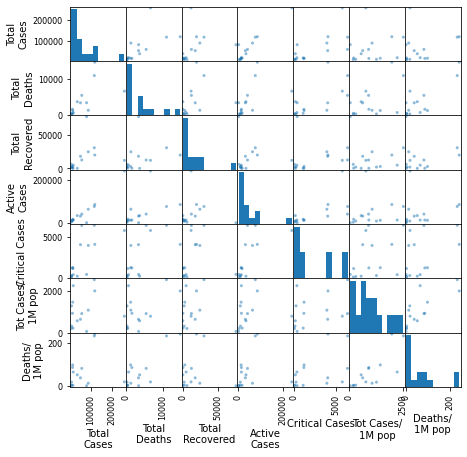

In [0]:
pd.plotting.scatter_matrix(df,figsize=(7,7));

##Matrice De Corrélation:

In [0]:
corr=df.corr()

In [0]:
corr

,Total\nCases,Total\nDeaths,Total\nRecovered,Active\nCases,Critical Cases\n,Tot Cases/\n1M pop,Deaths/\n1M pop
Total\nCases,1.000000,0.636166,0.347124,0.947703,0.702073,0.174324,0.238291
Total\nDeaths,0.636166,1.000000,0.310030,0.531107,0.678869,0.512754,0.829871
Total\nRecovered,0.347124,0.310030,1.000000,0.034090,0.188603,-0.072908,0.063467
Active\nCases,0.947703,0.531107,0.034090,1.000000,0.666842,0.180265,0.183688
Critical Cases\n,0.702073,0.678869,0.188603,0.666842,1.000000,0.380228,0.492450
Tot Cases/\n1M pop,0.174324,0.512754,-0.072908,0.180265,0.380228,1.000000,0.786794
Deaths/\n1M pop,0.238291,0.829871,0.063467,0.183688,0.492450,0.786794,1.000000


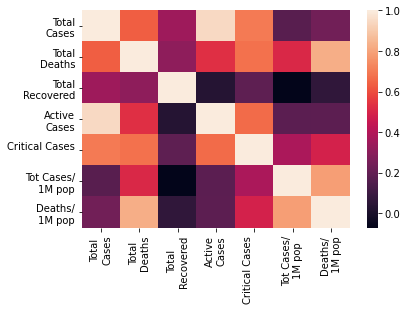

In [0]:
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

##Matrice de Covariance:

In [0]:
cov=df.cov()

In [0]:
cov

,Total\nCases,Total\nDeaths,Total\nRecovered,Active\nCases,Critical Cases\n,Tot Cases/\n1M pop,Deaths/\n1M pop
Total\nCases,4.457656e+09,1.830053e+08,4.585169e+08,3.816134e+09,1.152171e+08,8.839909e+06,1.238979e+06
Total\nDeaths,1.830053e+08,1.856437e+07,2.642777e+07,1.380132e+08,7.189642e+06,1.677982e+06,2.784537e+05
Total\nRecovered,4.585169e+08,2.642777e+07,3.914122e+08,4.067692e+07,9.171618e+06,-1.095543e+06,9.778428e+04
Active\nCases,3.816134e+09,1.380132e+08,4.067692e+07,3.637444e+09,9.885580e+07,8.257470e+06,8.627410e+05
Critical Cases\n,1.152171e+08,7.189642e+06,9.171618e+06,9.885580e+07,6.041746e+06,7.098448e+05,9.426399e+04
Tot Cases/\n1M pop,8.839909e+06,1.677982e+06,-1.095543e+06,8.257470e+06,7.098448e+05,5.768670e+05,4.653734e+04
Deaths/\n1M pop,1.238979e+06,2.784537e+05,9.778428e+04,8.627410e+05,9.426399e+04,4.653734e+04,6.064638e+03


In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA 

In [0]:
x = df.iloc[:,1:8]
x=np.array(x)
type(x)

numpy.ndarray

In [0]:
dfprocessed = preprocessing.scale(x)

In [0]:
dfprocessed

array([[ 3.05037591,  0.72875362, -0.11561237,  3.36268713,  1.43970686,
        -0.30827361, -0.59458018],
       [ 0.90648149,  2.67684264,  0.29336996,  0.71602314,  0.71833742,
         1.32985585,  2.36945961],
       [ 0.87366069,  1.77691152,  0.85606727,  0.55939712,  1.70711468,
         2.0603362 ,  2.24983469],
       [ 0.43554872, -0.5598824 ,  0.54539348,  0.34325115,  0.66275028,
         0.0842233 , -0.67433013],
       [ 0.31414122, -0.05201951,  3.26580349, -0.71981837, -0.83515463,
        -1.2936044 , -0.83383003],
       [-0.03491893,  0.44407172, -0.09013272, -0.04081384,  1.69995573,
        -0.13791905,  0.24279429],
       [-0.12673036, -0.05874617,  0.19799132, -0.20104401,  0.70444063,
        -0.50861058, -0.34203867],
       [-0.35951464,  0.01596781, -0.73329758, -0.1585837 , -0.9261154 ,
        -0.60537197, -0.15595546],
       [-0.65198721, -0.71243346, -0.48681994, -0.51117246, -0.84820918,
         1.6678393 ,  0.0168361 ],
       [-0.67009523, -0.7645

Les Valeurs Propres:

In [0]:
eig_vals, eig_vecs = np.linalg.eig(corr)

In [0]:
print(eig_vals)
print(eig_vecs)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print(eig_pairs)

eig_pairs.sort(key=lambda dfprocessed: dfprocessed[0], reverse=True)
print(eig_pairs)
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
matrix_w = np.hstack((eig_pairs[0][1].reshape(7,1),
                      eig_pairs[1][1].reshape(7,1)))

print('Matrix W:\n', matrix_w)



[ 3.74529982e+00  1.56393789e+00  1.01346207e+00 -3.68342682e-16
  2.45606716e-02  3.41829326e-01  3.10910225e-01]
[[ 4.25787276e-01  4.25988944e-01 -7.80700915e-02  7.23959329e-01
   1.22728550e-01  2.57779236e-01 -1.59731443e-01]
 [ 4.68976618e-01 -1.30219469e-01  1.82342274e-01 -4.67198019e-02
  -6.31092931e-01 -3.52968318e-01 -4.52556578e-01]
 [ 1.42376508e-01  2.62840217e-01  8.82957801e-01 -2.14525074e-01
   8.98776781e-02  2.41788080e-01  1.35900671e-01]
 [ 3.91146586e-01  3.94660248e-01 -3.89091924e-01 -6.53971821e-01
   1.51465242e-01  2.31267896e-01 -1.89075144e-01]
 [ 4.38963953e-01  1.08548820e-01 -9.48997115e-02 -7.49588347e-16
  -1.77758244e-02 -4.52059775e-01  7.62789503e-01]
 [ 3.04580581e-01 -5.44402472e-01 -8.77222712e-02 -1.16386909e-15
  -2.66014831e-01  6.72318243e-01  2.83523740e-01]
 [ 3.74220152e-01 -5.18244846e-01  1.13790161e-01  3.54430647e-15
   6.96103318e-01 -2.01611153e-01 -2.30708628e-01]]
Eigenvectors 
[[ 4.25787276e-01  4.25988944e-01 -7.80700915e-02  

In [0]:

Y = dfprocessed.dot(matrix_w)
print(Y) 


[[ 3.25500414  3.13350137]
 [ 3.57025592 -1.476693  ]
 [ 3.76484739 -1.51575004]
 [ 0.19902042  0.91282296]
 [-0.77986496  1.76060993]
 [ 0.95966458  0.0212848 ]
 [-0.10564575  0.456975  ]
 [-0.96129955 -0.10069499]
 [-0.73901896 -1.52343511]
 [-1.78642962  0.39476681]
 [-0.71625972 -1.19999633]
 [-0.97920593 -0.77130107]
 [-2.02623841  0.20423181]
 [-1.53953811 -0.6023083 ]
 [-2.11529145  0.30598614]]


In [0]:
acp = PCA(n_components=2)
acp.fit_transform(dfprocessed)
print('Coordonnees des variables: \n', acp.components_ )
z=np.transpose(dfprocessed)
c=corr
c=z.dot(dfprocessed)
print("c: \n",c)

Coordonn�es des variables: 
 [[ 0.42578728  0.46897662  0.14237651  0.39114659  0.43896395  0.30458058
   0.37422015]
 [ 0.42598894 -0.13021947  0.26284022  0.39466025  0.10854882 -0.54440247
  -0.51824485]]
c: 
 [[15.          9.54248723  5.20686275 14.21554249 10.53109473  2.61485668
   3.57436976]
 [ 9.54248723 15.          4.65044497  7.96661018 10.18303397  7.69131389
  12.44806164]
 [ 5.20686275  4.65044497 15.          0.51135672  2.82903826 -1.09361786
   0.95200818]
 [14.21554249  7.96661018  0.51135672 15.         10.00262564  2.70397228
   2.75531403]
 [10.53109473 10.18303397  2.82903826 10.00262564 15.          5.70342299
   7.38674965]
 [ 2.61485668  7.69131389 -1.09361786  2.70397228  5.70342299 15.
  11.80191652]
 [ 3.57436976 12.44806164  0.95200818  2.75531403  7.38674965 11.80191652
  15.        ]]


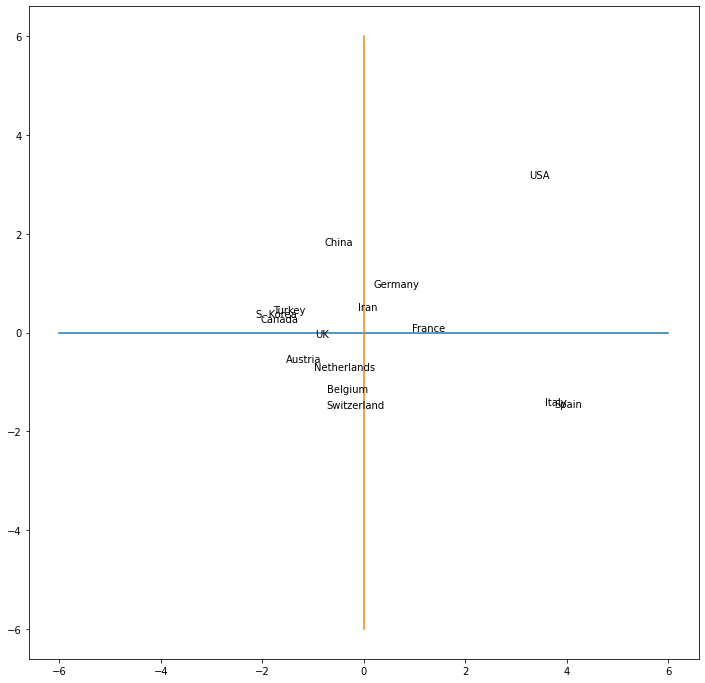

In [0]:
#Plan factoriel
# Création des figures
fig, axes = plt.subplots(figsize=(12, 12))
tmp = pd.DataFrame(columns=list(df))
for i in range(15):
    tmp.loc[i]=df.iloc[i]
    plt.annotate(tmp.loc[i].Country, (acp.fit_transform(dfprocessed)[i, 0], acp.fit_transform(dfprocessed)[i, 1]))
    
# Échelle des axes
plt.plot([-6,6], [0,0])
plt.plot([0,0], [-6,6])
plt.show()



On regardera ici la proximité ou l'éloignement des pays ce qui expriment la similarité d'états de certains pays et la gravité de situation de quelques un par rapport aux autres.

               Variable  Composante 1  Composante 2
0        \tTotal\nCases      0.852938      0.551429
1         Total\nDeaths      0.939455     -0.168565
2    Total\nRecovered\t      0.285209      0.340238
3         Active\nCases      0.783546      0.510875
4    \tCritical Cases\n      0.879334      0.140513
5  \tTot Cases/\n1M pop      0.610137     -0.704712
6     \tDeaths/\n1M pop      0.749639     -0.670851


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


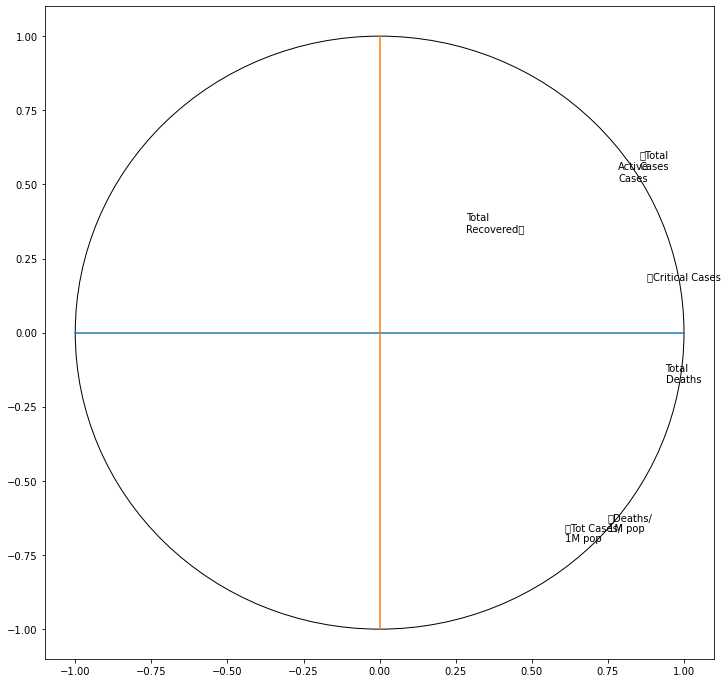

In [0]:
#Cercle de cooreleation

select=['	Total\nCases',	'Total\nDeaths',	'Total\nRecovered	','Active\nCases','	Critical Cases\n','	Tot Cases/\n1M pop','	Deaths/\n1M pop']
x = np.sqrt(acp.explained_variance_)
y = np.zeros((len(select), len(select)))
for i in range(2):
    y[:,i] = acp.components_[i,:] * x[i]

print(pd.DataFrame({'Variable':select, 'Composante 1':y[:,0], 'Composante 2':y[:,1]}))

# Création des figures
fig, axes = plt.subplots(figsize=(12,12))

# Récupération des noms
for i in range(len(select)):
    plt.annotate(select[i],(y[i,0], y[i,1]))

# Échelle des axes
plt.plot([-1,1],[0,0])
plt.plot([0,0],[-1,1])

# Ajouter un cercle
cercle = plt.Circle((0,0), 1, fill=False)
axes.add_artist(cercle)

# Affichage du cercle
plt.show()

**Conclusion:**
Sans grande surprise, total number of cases et total number of deaths semblent assez corrélés puisque c'est d'une maladie infectieuse et émergente qui attaque les personnes agées et ceux qui ont des maladies chroniques, ça s'explique aussi par la faible performance de ces systèmes de santé de certains pays. Le numbre critical of cases ne sont guère loin pour la même raison. Le total number of recovered par contre est plus éloigné c'est assez logique, puisque cette pandémie n'a pas encore un traitement ce qui explique aussi la forte corrélation de total number of active cases et total number of cases. On constate que le total number of cases per 1 Million population et le number of deaths per 1Million est faiblement corrélé avec le number total of cases c'est évident puique on a environ 7 milliards personnes et seulement 2millions personnes infectés sur le monde enitier et 200 000 décès.

**Réalisé par:**
  *   Malek Zoghlami
  *   Mohamed Rekik

2éme informatique A


